In [1]:
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

In [3]:
!ls

Final_Data_Indiangoslist_v1.com.xlsx  indianngoEDA.ipynb
Final_Data_ngoimpact.com.xlsx	      Untitled.ipynb


# Dataset Information:
#### Data File: Final_Data_Indiangoslist_v1.com.xlsx
#### Source: https://github.com/DaanMatch/Codebook/blob/main/ds/indiangolist_harish/Final_Data_Indiangoslist_v1.com.xlsx
#### Type: xlsx
#### Size: 30.1 MB

In [4]:
ngolist = pd.read_excel("Final_Data_Indiangoslist_v1.com.xlsx")

In [5]:
ngolist.head()

,Url,NGO Name,Unique Id,Chief Functionary,Chairman,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,...,State,Telephone,Mobile,Address,email,Website,Fax,Ngo Information,Key Issues,Major Activities and Achivements
0,http://www.indiangoslist.com/ngo-address/abo-t...,ABO TANI WELFARE SOCIETY,AR/2010/0027372,Mage Kamda,Mage Kamda,Paksing Maling,Tape Maling,Registrar of Societies,Society,SR/ITA/2271,...,Arunachal Pradesh,0360-2292635,9.436054e+09,"Village Kodak, P.O- and P.S- Taliha, Upper Sub...",atwsngo@yahoo.in,NaN,NaN,ABO TANI WELFARE SOCIETY is located in Upper S...,This ABO TANI WELFARE SOCIETY NGO charity is w...,"Flower Plantation, Weaving Material, Youth Dev..."
1,http://www.indiangoslist.com/ngo-address/aan-a...,AAN AAB WELFARE SOCIETY,AR/2010/0038998,Chairman,Chairman,NaN,NaN,Registrar of Cooperative Societies,Cooperative Society,SR/ITS/3251,...,Arunachal Pradesh,9199-100015,NaN,Tili Lower Subansiri District,aaws2011@gmail.com,NaN,NaN,AAN AAB WELFARE SOCIETY is located in Lower Su...,This AAN AAB WELFARE SOCIETY NGO charity is wo...,Orphanage Home
2,http://www.indiangoslist.com/ngo-address/amik-...,AMIK MATAI SOCIETY,AR/2009/0009702,Rakhi Bora,Ruzing Bellai,Sonem Kri,Dalimi Tayang,Registrar of Societies,Society,SR ITA 2849,...,Arunachal Pradesh,03804-222878,9.436227e+09,Amik Matai Society Post Box No 8 New Mekailian...,amikmatai@gmail.com,http://ngo.india.gov.in,03804-222878,AMIK MATAI SOCIETY is located in Tezu Arunacha...,This AMIK MATAI SOCIETY NGO charity is working...,Implemented the National Bamboo Mission progra...
3,http://www.indiangoslist.com/ngo-address/all-h...,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA,AR/2012/0048621,Shri Tani Singyum,Shri Tani Singyum,NaN,NaN,Registrar of Societies,Society,SR/ITA/8728,...,Arunachal Pradesh,0379-2224167,NaN,Rural works Division Daporijo Upper Subansiri ...,allgumsing@gmail.com,NaN,NaN,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA is loca...,This ALL HAMAI DEVELOPMENT ASSOCIATION AHDA NG...,Rural Development & Poverty Alleviation progra...
4,http://www.indiangoslist.com/ngo-address/ane-a...,ANE ABO WELFARE SOCIETY,AR/2010/0036913,Shri Hengo Bam,Shri Hengo Bam,Mrs Yabi Bam,Shri Henya Bam,Registrar of Societies,Society,SR/ITA/2616,...,Arunachal Pradesh,0379-5222241,9.436411e+09,"Basar, West Siang District Arunachal Pradesh.",aneabow@gmail.com,NaN,NaN,ANE ABO WELFARE SOCIETY is located in Arunacha...,This ANE ABO WELFARE SOCIETY NGO charity is wo...,Maintenance and running of: (1) Treatment cum ...


# 2. Dataset Characteristics

In [6]:
print("Shape:",ngolist.shape)
print("Rows:",ngolist.shape[0])
print("Columns:",ngolist.shape[1])
print("Each row represents a unique NGO within India")

Shape: (56184, 24)
Rows: 56184
Columns: 24
Each row represents a unique NGO within India


In [7]:
# number of values in dataset
len(ngolist)

56184

In [8]:
# lists the variables in the dataset
v = pd.DataFrame(ngolist.columns)
v.rename({"0": "Columns"}, axis = 1, inplace = True)
v

,0
0,Url
1,NGO Name
2,Unique Id
3,Chief Functionary
4,Chairman
5,Secretary
6,Treasurer
7,Registered With
8,Type of NGO
9,Registration Number


# 3. EDA

In [9]:
counts = ngolist['State'].value_counts(ascending = False)
top_ten_states = counts[0:10]
top_ten_states

Uttar Pradesh     9293
Maharashtra       6374
West Bengal       5509
Andhra Pradesh    3334
Delhi             3290
Tamil Nadu        3087
Bihar             2871
Orissa            2805
Madhya Pradesh    2703
Gujarat           2700
Name: State, dtype: int64

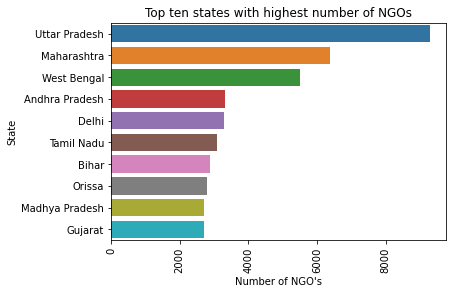

In [10]:
# plotting the top 10 states with the highest number of NGO's 

sns.barplot(x = top_ten_states.values, y = top_ten_states.index, linewidth = 3)
sns.set(rc={'figure.figsize':(15,15)})
plt.ylabel('State')
plt.xlabel("Number of NGO's")
plt.title('Top ten states with highest number of NGOs')
plt.xticks(rotation=90)
plt.show()

#### States with the highest number of NGO's observed here. Can further investigate if population has a relationship with the number of NGO's in a state.

In [11]:
result = ngolist.dtypes
result

Url                                  object
NGO Name                             object
Unique Id                            object
Chief Functionary                    object
Chairman                             object
Secretary                            object
Treasurer                            object
Registered With                      object
Type of NGO                          object
Registration Number                  object
City of Registration                 object
State of Registration                object
Date of Registration                 object
City                                 object
State                                object
Telephone                            object
Mobile                              float64
Address                              object
email                                object
Website                              object
Fax                                  object
Ngo Information                      object
Key Issues                      

#### Datatypes of each variable. "Object": represents mixed datatypes.

In [12]:
type_counts = ngolist['Type of NGO'].value_counts(ascending = False)
type_counts

Society                                               42155
Trust                                                 11534
Society Society                                         741
Cooperative Society                                     693
Trust Trust                                             459
Section 25 Company                                      434
Society Society Society                                  66
Society Trust                                            32
Trust Society                                            24
Trust Trust Trust                                        18
Cooperative Society Cooperative Society                   9
Section 25 Company Section 25 Company                     4
Trust Trust Society                                       3
Section 25 Company Section 25 Company Section 25 C        2
Society Society Trust                                     2
Cooperative Society Trust                                 2
Cooperative Society Cooperative Society 

/home/harish/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

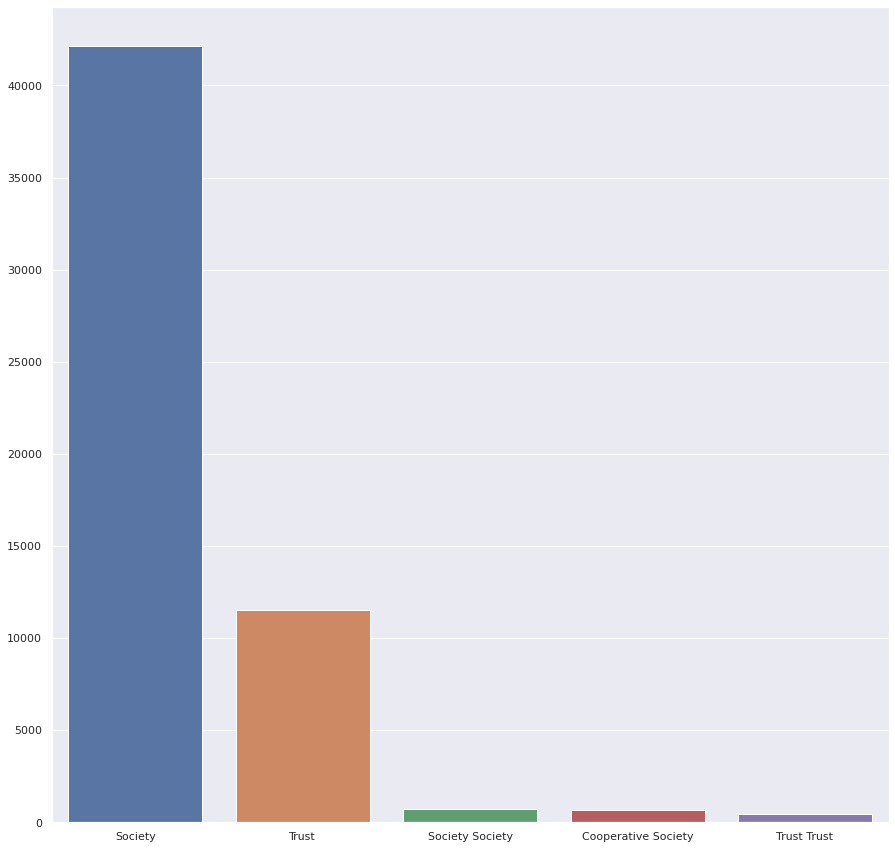

In [13]:
sns.barplot(type_counts.index[0:5], type_counts.values[0:5])

#### Here, the most common NGO by type are listed. We can see there are a few key words that are recurrant, mainly being "Society", "Trust" and "Cooperative". 

#### Breaking the terminology down:

#### Society: An NGO is typically a non-profit organization that is run by volunteers, while a Society is a group of people who have banded together for a common purpose (https://vakilsearch.com/blog/differences-between-an-ngo-and-a-society/)

#### Trust: Trust is one of the forms of NGOs in India. These are registered to work on activities such as providing education, supplying medical relief, eradicating poverty, etc. Trusts are run as per the regulations laid down in the trust deed (https://swaritadvisors.com/blog/overview-of-difference-between-ngo-and-trust/#:~:text=Trust%20is%20one%20of%20the,down%20in%20the%20trust%20deed.)

#### Cooperative: A Co-operative can be defined as “an autonomous association of persons united voluntarily to meet their common economic, social, and cultural needs and aspirations through a jointly-owned and democratically-controlled enterprise (https://www.618bees.com/article/604-differences-between-a-co-operative-society-and-an-ngo-foundation#:~:text=A%20Co%2Doperative%20can%20be,owned%20and%20democratically%2Dcontrolled%20enterprise.) 

In [14]:
total = sum(type_counts.values)
percent_society = type_counts.values[0]/total * 100
percent_trust = type_counts.values[1]/total * 100
percent_cooperative = type_counts.values[3]/total * 100

percents_dict = {"society percentage": percent_society, "trust percentage": percent_trust, "cooperative percentage": percent_cooperative}
percents_dict

{'society percentage': 75.0302577246191,
 'trust percentage': 20.52897622098818,
 'cooperative percentage': 1.2334472447671936}

#### As seen here, 'society' make up the vast majority of NGO type in India at 75%, and 'trust' comes at second at around 20%. 

#### However, it can be inferred through intuition that the classification groups are mostly redundant and can largely be placed into one of these three groups. For example, we could place "Trust Trust", and "Trust Trust Trust" into the single "Trust" Category. 

#### I will create a new data frame merging the obvious groups together, and then calculate the percentages by category and then visualize it to get a clearer picture of the data and observe if there are any differences.

In [15]:
merged_ngolist = ngolist.replace("Society Society", "Society")
merged_ngolist.replace("Trust Trust", "Trust", inplace = True)
merged_ngolist.replace("Society Society Society", "Society", inplace = True)
merged_ngolist.replace("Trust Trust Trust", "Trust", inplace = True)
merged_ngolist.loc[merged_ngolist['Type of NGO'].str.contains('Cooperative'), 'Type of NGO'] = 'Cooperative'
merged_ngolist

,Url,NGO Name,Unique Id,Chief Functionary,Chairman,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,...,State,Telephone,Mobile,Address,email,Website,Fax,Ngo Information,Key Issues,Major Activities and Achivements
0,http://www.indiangoslist.com/ngo-address/abo-t...,ABO TANI WELFARE SOCIETY,AR/2010/0027372,Mage Kamda,Mage Kamda,Paksing Maling,Tape Maling,Registrar of Societies,Society,SR/ITA/2271,...,Arunachal Pradesh,0360-2292635,9.436054e+09,"Village Kodak, P.O- and P.S- Taliha, Upper Sub...",atwsngo@yahoo.in,NaN,NaN,ABO TANI WELFARE SOCIETY is located in Upper S...,This ABO TANI WELFARE SOCIETY NGO charity is w...,"Flower Plantation, Weaving Material, Youth Dev..."
1,http://www.indiangoslist.com/ngo-address/aan-a...,AAN AAB WELFARE SOCIETY,AR/2010/0038998,Chairman,Chairman,NaN,NaN,Registrar of Cooperative Societies,Cooperative,SR/ITS/3251,...,Arunachal Pradesh,9199-100015,NaN,Tili Lower Subansiri District,aaws2011@gmail.com,NaN,NaN,AAN AAB WELFARE SOCIETY is located in Lower Su...,This AAN AAB WELFARE SOCIETY NGO charity is wo...,Orphanage Home
2,http://www.indiangoslist.com/ngo-address/amik-...,AMIK MATAI SOCIETY,AR/2009/0009702,Rakhi Bora,Ruzing Bellai,Sonem Kri,Dalimi Tayang,Registrar of Societies,Society,SR ITA 2849,...,Arunachal Pradesh,03804-222878,9.436227e+09,Amik Matai Society Post Box No 8 New Mekailian...,amikmatai@gmail.com,http://ngo.india.gov.in,03804-222878,AMIK MATAI SOCIETY is located in Tezu Arunacha...,This AMIK MATAI SOCIETY NGO charity is working...,Implemented the National Bamboo Mission progra...
3,http://www.indiangoslist.com/ngo-address/all-h...,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA,AR/2012/0048621,Shri Tani Singyum,Shri Tani Singyum,NaN,NaN,Registrar of Societies,Society,SR/ITA/8728,...,Arunachal Pradesh,0379-2224167,NaN,Rural works Division Daporijo Upper Subansiri ...,allgumsing@gmail.com,NaN,NaN,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA is loca...,This ALL HAMAI DEVELOPMENT ASSOCIATION AHDA NG...,Rural Development & Poverty Alleviation progra...
4,http://www.indiangoslist.com/ngo-address/ane-a...,ANE ABO WELFARE SOCIETY,AR/2010/0036913,Shri Hengo Bam,Shri Hengo Bam,Mrs Yabi Bam,Shri Henya Bam,Registrar of Societies,Society,SR/ITA/2616,...,Arunachal Pradesh,0379-5222241,9.436411e+09,"Basar, West Siang District Arunachal Pradesh.",aneabow@gmail.com,NaN,NaN,ANE ABO WELFARE SOCIETY is located in Arunacha...,This ANE ABO WELFARE SOCIETY NGO charity is wo...,Maintenance and running of: (1) Treatment cum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56179,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR EMPOWERMENT OF VILLAGES AND AGRICU...,MH/2009/0003328,Krishna Shipkule,Krishna Shipkule,siddhappa vijapure,mahesh pawar,Charity Commissioner,Society,MAHA/8416/SATARA,...,Maharashtra,02162-237192,9.860925e+09,"FF-17, Shahu Steduim, Opposite HP Petrol pump,...",seva_satara@rediffmail.com,NaN,02162-230288,SOCIETY FOR EMPOWERMENT OF VILLAGES AND AGRICU...,This SOCIETY FOR EMPOWERMENT OF VILLAGES AND A...,Expertisatin in Micro Plainning & P.R.A. Follo...
56180,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INSTITUTE OF INFORMATION TECHNOLOGY,MH/2012/0050488,Sameer Chavan,Chandrakant Chavan,NaN,NaN,Sub-Registrar,Trust,1783,...,Maharashtra,022-28063468,9.320303e+09,"Shop No. 3, R. R. Shukla Compound, Carter Road...",mailatsiit@gmail.com,NaN,NaN,SOCIETY FOR INSTITUTE OF INFORMATION TECHNOLOG...,This SOCIETY FOR INSTITUTE OF INFORMATION TECH...,To open / run / manage institute / college of ...
56181,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INTEGRATD DEVELOPMENT AND RESEARCH...,MH/2009/0005411,Shri Balaso Vasantrao Jagtap,Shri Balaso Vasantrao Jagtap,Shri Abasaheb Ganpatrao Chavan,Sou Shantabai Vasantrao Jagtap,Charity Commissioner,Society,"Maha/190/2007, F- 11565/Sangli",...,Maharashtra,02344-247114,9.890202e+09,Head Office:- Society for Integrated Developme...,smita_kamlekar@rediffmail.com,NaN,02344-247

In [16]:
merged_type_counts = merged_ngolist['Type of NGO'].value_counts(ascending = False)
merged_type_counts

Society                                               42962
Trust                                                 12011
Cooperative                                             706
Section 25 Company                                      434
Society Trust                                            32
Trust Society                                            24
Section 25 Company Section 25 Company                     4
Trust Trust Society                                       3
Section 25 Company Section 25 Company Section 25 C        2
Society Society Trust                                     2
Society Section 25 Company                                1
Section 25 Company Trust                                  1
Society Section 25 Company Section 25 Company             1
Society Society Section 25 Company                        1
Name: Type of NGO, dtype: int64

In [17]:
total_s = sum(merged_type_counts.values)
percent_society_re = merged_type_counts.values[0]/total_s * 100
percent_trust_re = merged_type_counts.values[1]/total_s * 100
percent_cooperative_re = merged_type_counts.values[2]/total_s * 100

percents_dict = {"society percentage": percent_society_re, "trust percentage": percent_trust_re, "cooperative percentage": percent_cooperative_re}
percents_dict

{'society percentage': 76.46660971094974,
 'trust percentage': 21.377972376477288,
 'cooperative percentage': 1.2565855047700412}

/home/harish/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

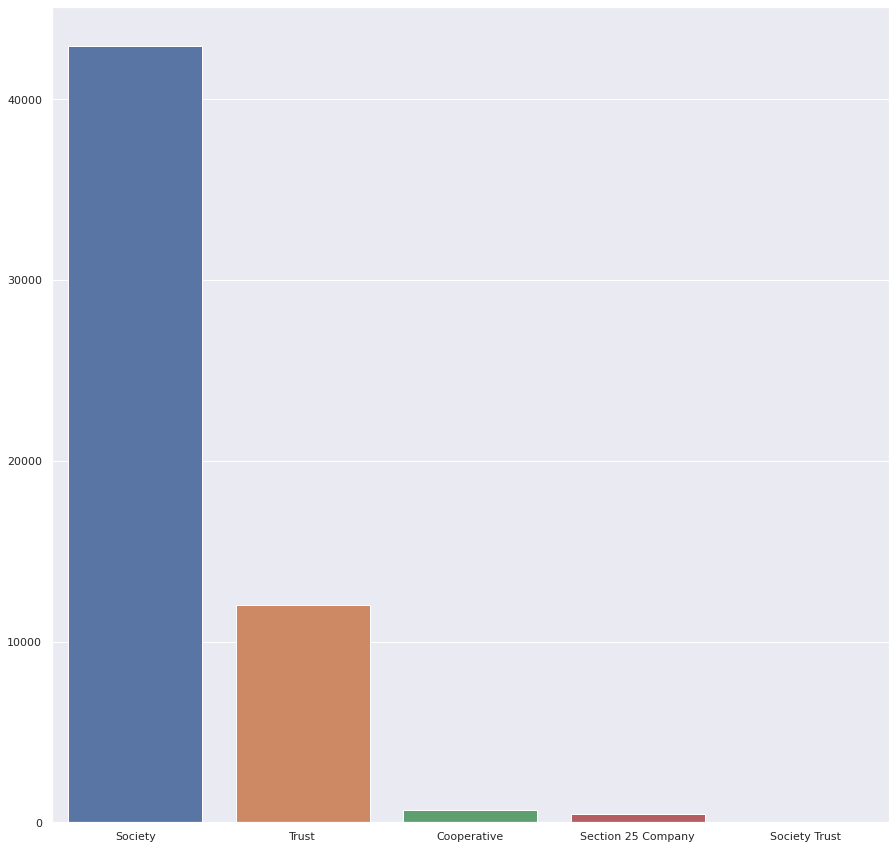

In [18]:
sns.barplot(merged_type_counts.index[0:5], merged_type_counts.values[0:5])

#### Although there is only a minimal change in percentage for each category, we have the data in a much cleaner format, with the vast majority of values being grouped into one of three categories.

In [19]:
na_ngolist = ngolist.dropna()
na_ngolist

,Url,NGO Name,Unique Id,Chief Functionary,Chairman,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,...,State,Telephone,Mobile,Address,email,Website,Fax,Ngo Information,Key Issues,Major Activities and Achivements
2,http://www.indiangoslist.com/ngo-address/amik-...,AMIK MATAI SOCIETY,AR/2009/0009702,Rakhi Bora,Ruzing Bellai,Sonem Kri,Dalimi Tayang,Registrar of Societies,Society,SR ITA 2849,...,Arunachal Pradesh,03804-222878,9.436227e+09,Amik Matai Society Post Box No 8 New Mekailian...,amikmatai@gmail.com,http://ngo.india.gov.in,03804-222878,AMIK MATAI SOCIETY is located in Tezu Arunacha...,This AMIK MATAI SOCIETY NGO charity is working...,Implemented the National Bamboo Mission progra...
71,http://www.indiangoslist.com/ngo-address/disab...,DISABILITY RIGHTS ASSOCIATION OF GOA,GA/2009/0008767,MR AVELINO DE SA,MR AVELINO DE SA,MR VICTOR FERNANDES,MR VICTOR FERNANDES,Registrar of Societies,Society,259/Goa/2003,...,Goa,0832-2427160,9.326121e+09,C/o STAR INVESTMENTS OPP. HEAD POST OFFICE,dragoa@rediffmail.com,http://www.disabilitygoa.com,0832-2427160,DISABILITY RIGHTS ASSOCIATION OF GOA is locate...,This DISABILITY RIGHTS ASSOCIATION OF GOA NGO ...,Winner of the Godfrey Phillips Bravey Award fo...
97,http://www.indiangoslist.com/ngo-address/jhark...,JHARKHAND JYOTI,JH/2011/0042327,JAYANTA MANDAL,BHOLA SHANKAR GUPTA,JAYANTA MANDAL,MRS SULATA MANDAL,Registrar of Societies,Society,598,...,Jharkhand,0657-2281833,9.204736e+09,"Jharkhand Jyoti, C/O B K Mandal Zone No: 6B, H...",jharkhandjyoti@gmail.com,http://www.jharkhandjyoti.org.in,0657-2281833,JHARKHAND JYOTI is located in JAMSHEDPUR Jhark...,This JHARKHAND JYOTI NGO charity is working on...,"Livilehood prototype, Tribal Affairs, Agricult..."
101,http://www.indiangoslist.com/ngo-address/krush...,KRUSHI GRAM VIKAS MANDAL,DN/2009/0015224,Rathava Chandubhai Ramabhai,Bariya Dharmendrabhai Ramanbhai,Nayika Savitaben Kadavbhai,Bhil dahyabhai Seriyabhai,Charity Commissioner,Trust,F/1362/Vadodara,...,Dadra and Nagar Haveli,0260-265464,9.879721e+09,Krushi Gram Vikas Mandal F-204. Padmavati Viha...,Krushi12@gmail.com,http://ngo.india.gov.in,0260-265464,KRUSHI GRAM VIKAS MANDAL is located in Silvass...,This KRUSHI GRAM VIKAS MANDAL NGO charity is w...,KRUSHI GRAM VIKAS MANDAL Year 2007-08 Annual R...
103,http://www.indiangoslist.com/ngo-address/ideal...,IDEAL AND NATURAL DISCIPLINARY ORGANIZATION INDO,JH/2012/0051747,Pawan Kumar Sharma,Ramnath Ram,Pawan Kumar Sharma,Sourabh Kumar Singh,Registrar of Societies,Society,1074/2010-11,...,Jharkhand,0651-2290154,9.308404e+09,"Chandani Chowk, Hatia P.O.- Hatia P.S.- Jagann...",indoranchi@gmail.com,http://Indoranchi.in,0651-2290154,IDEAL AND NATURAL DISCIPLINARY ORGANIZATION IN...,This IDEAL AND NATURAL DISCIPLINARY ORGANIZATI...,Women Empowerment Programme SHG Formation And ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,http://www.indiangoslist.com/ngo-address/narri...,NARRIE,GJ/2009/0014862,DR MEHUL DAMANI,DR MEHUL DAMANI,DR SONAL DAMANI,PRAVINCHANDRA,Charity Commissioner,Trust,E/16844/AHMEDABAD,...,Gujarat,079-26304995,9.825050e+09,"302, Jay shiva Tower, opp.Azad Society, Azad-A...",mehuldamani1@yahoo.co.in,http://www.planetwomen.in,079-26308008,NARRIE is located in Ahmedabad Gujarat . NARRI...,This NARRIE NGO charity is working on Key Issu...,"we have developed various models,Cds, posters,..."
56154,http://www.indiangoslist.com/ngo-address/snehp...,SNEHPRAYAS,GJ/2010/0027764,satrugna sinah,Vinay Mehta,Amod K Kanth,Subhash Narang,Registrar of Societies,Society,S-200291,...,Gujarat,079-30070771,9.327759e+09,"401,Simandhar Avenue,8,Kailash Society, Behind...",snehprayas_ahmedabad@yahoo.com,http://www.snehprayas.org,02832-250309,SNEHPRAYAS is located in Bhuj Gujarat . SNEHPR...,This SNEHPRAYAS NGO charity is working on Key ...,� Basic needs and rights of children are synon...
56164,http://www.indiangoslist.com/ngo-address/rotar...,ROTARY CLUB OF MADRAS BOYS TOWN SOCIETY,TN/2009/001064

#### NGO List with all missing values in rows dropped. Through it could be potentially useful, it causes over 50 thousand rows to be expunged from the original dataset, which is far too much information to lose when trying to analyze the overall dataset in any meaningful sense, especially when most of the missing values are in irrelevant columns for analysis such as telephone or mobile.

In [20]:
merged_ngolist.groupby(["State", "Type of NGO"]).count()

Url  \
State                      Type of NGO                                                
Andaman and Nicobar Island Section 25 Company                                     3   
                           Society                                               16   
                           Trust                                                  4   
Andhra Pradesh             Cooperative                                           22   
                           Section 25 Company                                    24   
...                                                                             ...   
West Bengal                Cooperative                                           24   
                           Section 25 Company                                    29   
                           Section 25 Company Section 25 Company Section 25 C     1   
                           Society                                             5078   
                           Trust                                                377   

                                                                               NGO Name  \
State                      Type of NGO                                                    
Andaman and Nicobar Island Section 25 Company                                         3   
                           Society                                                   16   
                           Trust                                                      4   
Andhra Pradesh             Cooperative                                               22   
                           Section 25 Company                                        24   
...                                                                                 ...   
West Bengal                Cooperative                                               24   
                           Section 25 Company                                        29   
                           Section 25 Company Section 25 Company Section 25 C         1   
                           Society                                                 5077   
                           Trust                                                    377   

                                                                               Unique Id  \
State                      Type of NGO                                                     
Andaman and Nicobar Island Section 25 Company                                          3   
                           Society                                                    16   
                           Trust                                                       4   
Andhra Pradesh             Cooperative                                                22   
                           Section 25 Company                                         24   
...                                                                                  ...   
West Bengal                Cooperative                                                24   
                           Section 25 Company                                         29   
                           Section 25 Company Section 25 Company Section 25 C          1   
                           Society                                                  5078   
                           Trust                                                     377   

                                                                               Chief Functionary  \
State                      Type of NGO                                                             
Andaman and Nicobar Island Section 25 Company                                                  3   
                           Society                                                            16   
                           Trust                                                               4   
Andhra Pradesh             Cooperative                             

In [21]:
merged_ngolist.groupby(["State", "Type of NGO"]).count()["Unique Id"]

State                       Type of NGO                                       
Andaman and Nicobar Island  Section 25 Company                                       3
                            Society                                                 16
                            Trust                                                    4
Andhra Pradesh              Cooperative                                             22
                            Section 25 Company                                      24
                                                                                  ... 
West Bengal                 Cooperative                                             24
                            Section 25 Company                                      29
                            Section 25 Company Section 25 Company Section 25 C       1
                            Society                                               5078
                            Trust                  

# 4. Data Cleaning

In [22]:
merged_ngolist

,Url,NGO Name,Unique Id,Chief Functionary,Chairman,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,...,State,Telephone,Mobile,Address,email,Website,Fax,Ngo Information,Key Issues,Major Activities and Achivements
0,http://www.indiangoslist.com/ngo-address/abo-t...,ABO TANI WELFARE SOCIETY,AR/2010/0027372,Mage Kamda,Mage Kamda,Paksing Maling,Tape Maling,Registrar of Societies,Society,SR/ITA/2271,...,Arunachal Pradesh,0360-2292635,9.436054e+09,"Village Kodak, P.O- and P.S- Taliha, Upper Sub...",atwsngo@yahoo.in,NaN,NaN,ABO TANI WELFARE SOCIETY is located in Upper S...,This ABO TANI WELFARE SOCIETY NGO charity is w...,"Flower Plantation, Weaving Material, Youth Dev..."
1,http://www.indiangoslist.com/ngo-address/aan-a...,AAN AAB WELFARE SOCIETY,AR/2010/0038998,Chairman,Chairman,NaN,NaN,Registrar of Cooperative Societies,Cooperative,SR/ITS/3251,...,Arunachal Pradesh,9199-100015,NaN,Tili Lower Subansiri District,aaws2011@gmail.com,NaN,NaN,AAN AAB WELFARE SOCIETY is located in Lower Su...,This AAN AAB WELFARE SOCIETY NGO charity is wo...,Orphanage Home
2,http://www.indiangoslist.com/ngo-address/amik-...,AMIK MATAI SOCIETY,AR/2009/0009702,Rakhi Bora,Ruzing Bellai,Sonem Kri,Dalimi Tayang,Registrar of Societies,Society,SR ITA 2849,...,Arunachal Pradesh,03804-222878,9.436227e+09,Amik Matai Society Post Box No 8 New Mekailian...,amikmatai@gmail.com,http://ngo.india.gov.in,03804-222878,AMIK MATAI SOCIETY is located in Tezu Arunacha...,This AMIK MATAI SOCIETY NGO charity is working...,Implemented the National Bamboo Mission progra...
3,http://www.indiangoslist.com/ngo-address/all-h...,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA,AR/2012/0048621,Shri Tani Singyum,Shri Tani Singyum,NaN,NaN,Registrar of Societies,Society,SR/ITA/8728,...,Arunachal Pradesh,0379-2224167,NaN,Rural works Division Daporijo Upper Subansiri ...,allgumsing@gmail.com,NaN,NaN,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA is loca...,This ALL HAMAI DEVELOPMENT ASSOCIATION AHDA NG...,Rural Development & Poverty Alleviation progra...
4,http://www.indiangoslist.com/ngo-address/ane-a...,ANE ABO WELFARE SOCIETY,AR/2010/0036913,Shri Hengo Bam,Shri Hengo Bam,Mrs Yabi Bam,Shri Henya Bam,Registrar of Societies,Society,SR/ITA/2616,...,Arunachal Pradesh,0379-5222241,9.436411e+09,"Basar, West Siang District Arunachal Pradesh.",aneabow@gmail.com,NaN,NaN,ANE ABO WELFARE SOCIETY is located in Arunacha...,This ANE ABO WELFARE SOCIETY NGO charity is wo...,Maintenance and running of: (1) Treatment cum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56179,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR EMPOWERMENT OF VILLAGES AND AGRICU...,MH/2009/0003328,Krishna Shipkule,Krishna Shipkule,siddhappa vijapure,mahesh pawar,Charity Commissioner,Society,MAHA/8416/SATARA,...,Maharashtra,02162-237192,9.860925e+09,"FF-17, Shahu Steduim, Opposite HP Petrol pump,...",seva_satara@rediffmail.com,NaN,02162-230288,SOCIETY FOR EMPOWERMENT OF VILLAGES AND AGRICU...,This SOCIETY FOR EMPOWERMENT OF VILLAGES AND A...,Expertisatin in Micro Plainning & P.R.A. Follo...
56180,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INSTITUTE OF INFORMATION TECHNOLOGY,MH/2012/0050488,Sameer Chavan,Chandrakant Chavan,NaN,NaN,Sub-Registrar,Trust,1783,...,Maharashtra,022-28063468,9.320303e+09,"Shop No. 3, R. R. Shukla Compound, Carter Road...",mailatsiit@gmail.com,NaN,NaN,SOCIETY FOR INSTITUTE OF INFORMATION TECHNOLOG...,This SOCIETY FOR INSTITUTE OF INFORMATION TECH...,To open / run / manage institute / college of ...
56181,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INTEGRATD DEVELOPMENT AND RESEARCH...,MH/2009/0005411,Shri Balaso Vasantrao Jagtap,Shri Balaso Vasantrao Jagtap,Shri Abasaheb Ganpatrao Chavan,Sou Shantabai Vasantrao Jagtap,Charity Commissioner,Society,"Maha/190/2007, F- 11565/Sangli",...,Maharashtra,02344-247114,9.890202e+09,Head Office:- Society for Integrated Developme...,smita_kamlekar@rediffmail.com,NaN,02344-247

In [ ]:
merged_ngolist['Ngo Information']= merged_ngolist['Ngo Information'].map(str. lower)
merged_ngolist = merged_ngolist.astype({"Key Issues": str, "Major Activities and Achivements": str})
merged_ngolist['Key Issues']= merged_ngolist['Key Issues'].map(str. lower)
merged_ngolist["Major Activities and Achivements"] = merged_ngolist["Major Activities and Achivements"].map(str. lower)
merged_ngolist

,Url,NGO Name,Unique Id,Chief Functionary,Chairman,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,...,State,Telephone,Mobile,Address,email,Website,Fax,Ngo Information,Key Issues,Major Activities and Achivements
0,http://www.indiangoslist.com/ngo-address/abo-t...,ABO TANI WELFARE SOCIETY,AR/2010/0027372,Mage Kamda,Mage Kamda,Paksing Maling,Tape Maling,Registrar of Societies,Society,SR/ITA/2271,...,Arunachal Pradesh,0360-2292635,9.436054e+09,"Village Kodak, P.O- and P.S- Taliha, Upper Sub...",atwsngo@yahoo.in,NaN,NaN,abo tani welfare society is located in upper s...,this abo tani welfare society ngo charity is w...,"flower plantation, weaving material, youth dev..."
1,http://www.indiangoslist.com/ngo-address/aan-a...,AAN AAB WELFARE SOCIETY,AR/2010/0038998,Chairman,Chairman,NaN,NaN,Registrar of Cooperative Societies,Cooperative,SR/ITS/3251,...,Arunachal Pradesh,9199-100015,NaN,Tili Lower Subansiri District,aaws2011@gmail.com,NaN,NaN,aan aab welfare society is located in lower su...,this aan aab welfare society ngo charity is wo...,orphanage home
2,http://www.indiangoslist.com/ngo-address/amik-...,AMIK MATAI SOCIETY,AR/2009/0009702,Rakhi Bora,Ruzing Bellai,Sonem Kri,Dalimi Tayang,Registrar of Societies,Society,SR ITA 2849,...,Arunachal Pradesh,03804-222878,9.436227e+09,Amik Matai Society Post Box No 8 New Mekailian...,amikmatai@gmail.com,http://ngo.india.gov.in,03804-222878,amik matai society is located in tezu arunacha...,this amik matai society ngo charity is working...,implemented the national bamboo mission progra...
3,http://www.indiangoslist.com/ngo-address/all-h...,ALL HAMAI DEVELOPMENT ASSOCIATION AHDA,AR/2012/0048621,Shri Tani Singyum,Shri Tani Singyum,NaN,NaN,Registrar of Societies,Society,SR/ITA/8728,...,Arunachal Pradesh,0379-2224167,NaN,Rural works Division Daporijo Upper Subansiri ...,allgumsing@gmail.com,NaN,NaN,all hamai development association ahda is loca...,this all hamai development association ahda ng...,rural development & poverty alleviation progra...
4,http://www.indiangoslist.com/ngo-address/ane-a...,ANE ABO WELFARE SOCIETY,AR/2010/0036913,Shri Hengo Bam,Shri Hengo Bam,Mrs Yabi Bam,Shri Henya Bam,Registrar of Societies,Society,SR/ITA/2616,...,Arunachal Pradesh,0379-5222241,9.436411e+09,"Basar, West Siang District Arunachal Pradesh.",aneabow@gmail.com,NaN,NaN,ane abo welfare society is located in arunacha...,this ane abo welfare society ngo charity is wo...,maintenance and running of: (1) treatment cum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56179,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR EMPOWERMENT OF VILLAGES AND AGRICU...,MH/2009/0003328,Krishna Shipkule,Krishna Shipkule,siddhappa vijapure,mahesh pawar,Charity Commissioner,Society,MAHA/8416/SATARA,...,Maharashtra,02162-237192,9.860925e+09,"FF-17, Shahu Steduim, Opposite HP Petrol pump,...",seva_satara@rediffmail.com,NaN,02162-230288,society for empowerment of villages and agricu...,this society for empowerment of villages and a...,expertisatin in micro plainning & p.r.a. follo...
56180,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INSTITUTE OF INFORMATION TECHNOLOGY,MH/2012/0050488,Sameer Chavan,Chandrakant Chavan,NaN,NaN,Sub-Registrar,Trust,1783,...,Maharashtra,022-28063468,9.320303e+09,"Shop No. 3, R. R. Shukla Compound, Carter Road...",mailatsiit@gmail.com,NaN,NaN,society for institute of information technolog...,this society for institute of information tech...,to open / run / manage institute / college of ...
56181,http://www.indiangoslist.com/ngo-address/socie...,SOCIETY FOR INTEGRATD DEVELOPMENT AND RESEARCH...,MH/2009/0005411,Shri Balaso Vasantrao Jagtap,Shri Balaso Vasantrao Jagtap,Shri Abasaheb Ganpatrao Chavan,Sou Shantabai Vasantrao Jagtap,Charity Commissioner,Society,"Maha/190/2007, F- 11565/Sangli",...,Maharashtra,02344-247114,9.890202e+09,Head Office:- Society for Integrated Developme...,smita_kamlekar@rediffmail.com,NaN,02344-247